In [4]:
import os
import numpy as np
import cv2

data_dir = r"D:\Hope AI\Week 11 Deep Learning\Project\Dataset\train_zip\train"

images = []
labels = []
fruit_names = []

# First collect all fruit types
for file in os.listdir(data_dir):
    if file.endswith((".jpg", ".png", ".jpeg")):
        fruit = file.split("_")[0].lower()
        if fruit not in fruit_names:
            fruit_names.append(fruit)

fruit_names.sort()
print("Fruits found:", fruit_names)

# Assign labels
for file in os.listdir(data_dir):
    if file.endswith((".jpg", ".png", ".jpeg")):
        img_path = os.path.join(data_dir, file)
        
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128,128))
            images.append(img)

            fruit = file.split("_")[0].lower()
            label = fruit_names.index(fruit)
            labels.append(label)

        except:
            pass

images = np.array(images)
labels = np.array(labels)

print("Images:", len(images))
print("Labels:", len(labels))

Fruits found: ['apple', 'banana', 'mixed', 'orange']
Images: 240
Labels: 240


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalize
images = images / 255.0

# Split
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (192, 128, 128, 3)
Test shape: (48, 128, 128, 3)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')  # 4 fruits
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Anaconda3\envs\aiml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 0.9844 - loss: 0.0831 - val_accuracy: 0.8750 - val_loss: 0.4690
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 407ms/step - accuracy: 0.9896 - loss: 0.0461 - val_accuracy: 0.8542 - val_loss: 0.6285
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 423ms/step - accuracy: 0.9844 - loss: 0.0361 - val_accuracy: 0.8750 - val_loss: 0.5006
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - accuracy: 0.9948 - loss: 0.0226 - val_accuracy: 0.8333 - val_loss: 0.5985
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - accuracy: 0.9948 - loss: 0.0124 - val_accuracy: 0.8542 - val_loss: 0.6661
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.8333 - val_loss: 0.8668
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.8542 - val_loss: 0.7448
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 458ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8750 - val_loss:

In [10]:
loss, acc = model.evaluate(X_test, y_test)
print("Final Test Accuracy:", acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8750 - loss: 0.8965
Final Test Accuracy: 0.875


In [11]:
model.save("fruit_classifier_model.h5")

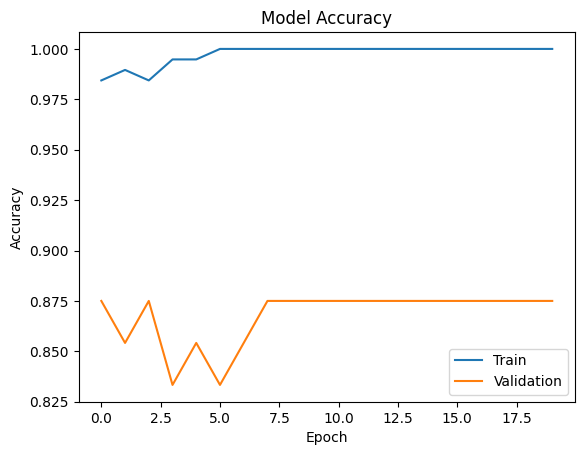

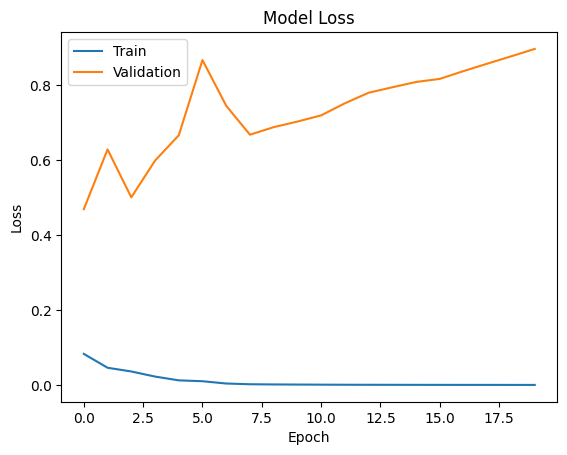

In [12]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"D:\Hope AI\Week 11 Deep Learning\Project\Dataset\train_zip\train\apple_1.jpg"

img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Your fruit names list
fruit_names = ['apple', 'banana', 'mixed', 'orange']

prediction = model.predict(img_array)

predicted_class = np.argmax(prediction)

print("Predicted Fruit:", fruit_names[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Fruit: apple
